# iFood Marketing

### Table of Contents

* [1. Project Description, Importing Data and Packages](#one)
* [2. Exploratory Data Analysis](#two)
* [3. Data Cleaning](#three)
* [4. Feature Engineering](#four)
* [5. Feature Selection](#five)
* [6. Modelling](#six)
* [7. Results & Interpretation](#seven)

### 1. Project Description, Importing Data and Packages  <a class="anchor" id="one"></a>

**Context:**

iFood is a Brazilian online food ordering and food delivery platform, operating in Brazil and Colombia. The company holds over 80% market share of the food delivery sector in Brazil.

This case assignment/dataset is used for hiring Data Analysts for the iFood Brain team, I decided to have a crack at it for fun. 

**Task:**

The objective of the team is to build a predictive model that will predict whether a customer will respond to a marketing campaign. This is a supervised dataset with response labels for 2240 customer records.


**Data:**



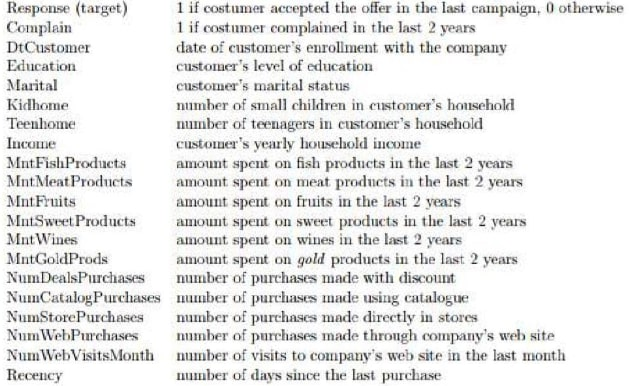

In [83]:
## Importing relevant packages
import numpy as np
import datetime
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectKBest,f_classif, chi2,RFECV
from imblearn.over_sampling import SMOTE 



from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,RepeatedKFold,learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_val_score,ShuffleSplit,StratifiedKFold

from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,accuracy_score, log_loss,classification_report

from catboost import CatBoostClassifier
from xgboost import XGBClassifier


### 2. Exploratory Data Analysis  <a class="anchor" id="two"></a>

In [84]:
pd.set_option('display.max_columns', None)

## Importing the data
data=pd.read_csv('marketing_data.csv',index_col='ID')

In [85]:
## This is what the first 5 rows of the data look like
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [86]:
## Replacing space values in column names
data.columns=data.columns.str.replace(' ','')

In [87]:
## Checking for missing values
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [88]:
## Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1826 to 4070
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3   Income               2216 non-null   object
 4   Kidhome              2240 non-null   int64 
 5   Teenhome             2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProds         2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  Num

In [89]:
##Exploring Categorical features
data.describe(include='object')

,Education,Marital_Status,Income,Dt_Customer
count,2240,2240,2216,2240
unique,5,8,1974,663
top,Graduation,Married,"$7,500.00",8/31/12
freq,1127,864,12,12


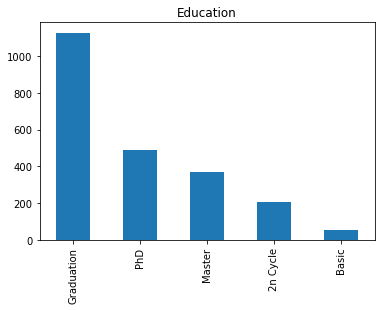

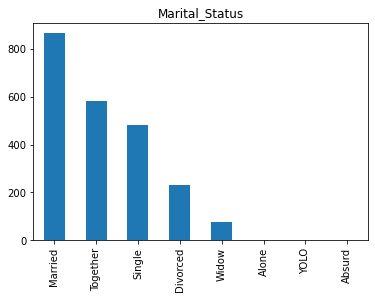

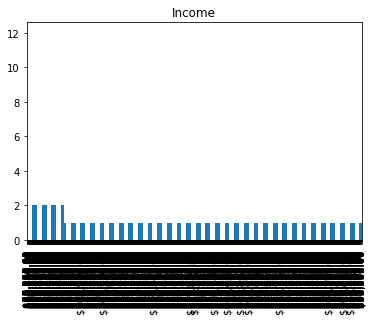

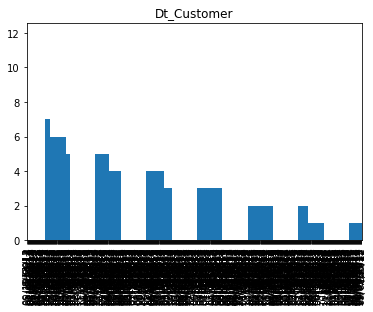

In [90]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    data[col].value_counts().plot(kind='bar',title=str(col))
    plt.show()

In [91]:
##Exploring Numerical features
data.describe()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


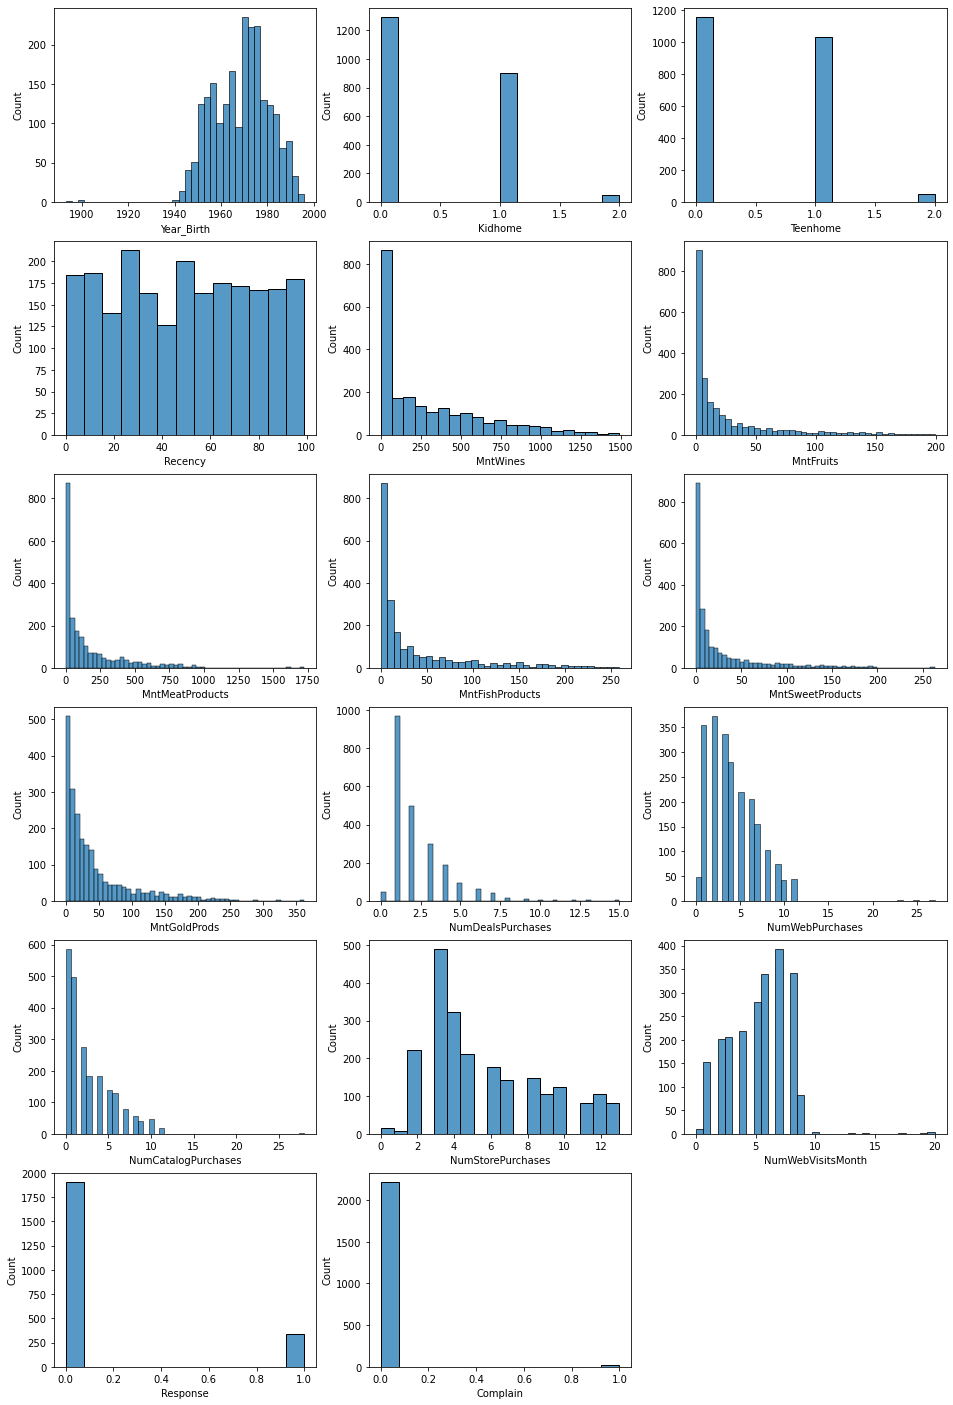

In [92]:
## Examining Distributions for Numerical columns

num_cols = data.select_dtypes(exclude='object').columns

fig = plt.figure(figsize=(16, 25))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = data[col], ax = ax)
    
plt.show()

### 3. Data Cleaning  <a class="anchor" id="three"></a>

**Marital Status**

In [93]:
## Dealing with Repetitive/Silly values

marital_stats=['Alone','Absurd','YOLO']

for stat in marital_stats:
    data['Marital_Status']=data['Marital_Status'].str.replace(stat,'Single')

**Income**

In [94]:
## Converting string to float
data['Income']=data['Income'].str.replace('$','').str.replace(',','').astype(float)

/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/540445233.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income']=data['Income'].str.replace('$','').str.replace(',','').astype(float)


In [95]:
## Filling missing values using education mean income of the customer
data['Income'] = data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'))

<AxesSubplot:>

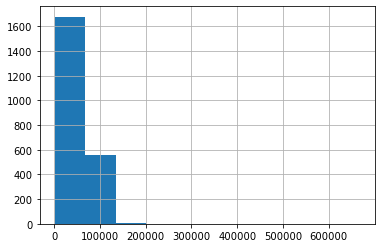

In [96]:
## As seen below we have a few outliers
data['Income'].hist()

<AxesSubplot:>

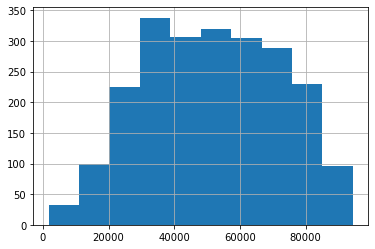

In [97]:
## Replacing outliers with 99 % quantile 
upper=data['Income'].quantile(0.99)
data['Income']=np.where(data['Income'] >upper, upper,data['Income'])
data['Income'].hist()

**Dt_Customer**

In [98]:
## Converting to datetime
data['date_acquired']=pd.to_datetime(data['Dt_Customer'])

**Year Birth**

In [99]:
## Correcting the wrong inputted values 
data['Year_Birth']=data['Year_Birth'].apply(lambda x: x +100 if x<1900 else x)

### 4. Feature Engineering  <a class="anchor" id="four"></a>

*Purchase Variables*

In [100]:
## Total number of orders by a customer
order_cols=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
data['Total_num_purchases']=data[order_cols].sum(axis=1)

In [101]:
## Total value of orders by a customer
spend_cols=data.columns[data.columns.str.contains('Mnt')]
data['Total_spend']=data[order_cols].sum(axis=1)

In [102]:
## Average Order Value
data['AOV']=data['Total_spend']/data['Total_num_purchases']

In [103]:
## The spend variables were very skewed, so will log transform for a nicer distribution

for col in spend_cols:
    data[col+'_log']=data[col].apply(lambda x: np.log(x) if x>0 else 0)

*Proportion Variables*

In [104]:
## Proportion of spend by product group
for col in spend_cols:
    data[col+'_prop']=data[col]/data['Total_spend']

In [105]:
## Proportion of spend by channel/purchase type
for col in order_cols:
    data[col+'_prop']=data[col]/data['Total_num_purchases']

*Date/Time Variables*

In [106]:
## Age for easier interpretation
data['Age']=2015-data['Year_Birth']

In [107]:
## Customer tenure
data['Tenure']=data['date_acquired'].apply(lambda x: (pd.to_datetime('2015-01-01')-x).days)

In [108]:
## Average time between orders
data['time_between_orders']=data['Tenure']/data['Total_num_purchases']

In [109]:
## Revenue to tenure ratio
data['spend_tenure_ratio']=data['Total_spend']/data['Tenure']

*Household Variables*

In [110]:
## Identifying whether the customer has a partner
data['couple']=data['Marital_Status'].apply(lambda x: 1 if x in ['Married','Together'] else 0)

In [111]:
## Calculating how many minors in the household
data['total_minors']=1+data['Kidhome']+data['Teenhome']

In [112]:
## Calculating how many are in the household
data['num_home']=1+data['Kidhome']+data['Teenhome']+data['couple']

In [113]:
## Calculating income per member
data['income/num_home']=data['Total_spend']/data['num_home']

*Categorical Variables*

In [114]:
cat_cols=['Education','Marital_Status']

encoder = TargetEncoder()

for col in cat_cols:
    data[col+'_encoded'] = encoder.fit_transform(data[col], data['Response'])

/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


*Other*

There are a few orders that only have a spend of 1 or 2 dollars in all categories,
I decided to drop them from the analysis in order not to skew the results

It seems although their data is incorrect, and we have a sufficient number of records so it won't compromise results

In [115]:
data[data['AOV'].isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,date_acquired,Total_num_purchases,Total_spend,AOV,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,MntWines_prop,MntFruits_prop,MntMeatProducts_prop,MntFishProducts_prop,MntSweetProducts_prop,MntGoldProds_prop,NumWebPurchases_prop,NumCatalogPurchases_prop,NumStorePurchases_prop,NumDealsPurchases_prop,Age,Tenure,time_between_orders,spend_tenure_ratio,couple,total_minors,num_home,income/num_home,Education_encoded,Marital_Status_encoded
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3955,1965,Graduation,Divorced,4861.00,0,0,6/22/14,20,2,1,1,1,0,1,0,0,0,0,14,0,0,2014-06-22,0,0,NaN,0.693147,0.0,0.000000,0.0,0.0,0.0,inf,inf,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,50,193,inf,0.0,0,1,1,0.0,0.134871,0.206897
11110,1973,Graduation,Single,3502.00,1,0,4/13/13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,2013-04-13,0,0,NaN,0.693147,0.0,0.000000,0.0,0.0,0.0,inf,inf,inf,NaN,NaN,inf,NaN,NaN,NaN,NaN,42,628,inf,0.0,0,2,2,0.0,0.134871,0.223819
5555,1975,Graduation,Divorced,94437.68,0,0,02/07/2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,2014-02-07,0,0,NaN,0.000000,0.0,0.000000,0.0,0.0,0.0,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,40,328,inf,0.0,0,1,1,0.0,0.134871,0.206897
11181,1949,PhD,Married,94437.68,0,0,8/29/13,85,2,1,2,1,1,1,0,0,0,0,0,0,0,2013-08-29,0,0,NaN,0.693147,0.0,0.693147,0.0,0.0,0.0,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,66,490,inf,0.0,1,1,2,0.0,0.207819,0.113426


In [116]:
## Dropping those incorrect looking records

data=data[data['AOV'].isna()==False]

In [117]:
## Dropping Categoricals

data=data.drop(['Education','Marital_Status','Dt_Customer','date_acquired'],axis=1)

In [118]:
X=data.drop(['Response'],axis=1)
y=data['Response']

In [119]:
print(f'The total number of features considered for selection & modelling: {len(X.columns)}')

The total number of features considered for selection & modelling: 46


### 5. Feature Selection  <a class="anchor" id="five"></a>

In [120]:
## Scaling or normalizing the data enables algorithms to better assess variables
scaler = StandardScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X),index=X.index, columns=X.columns)

In [121]:
## Recursive Feature Elemination with cross validation
rfecv = RFECV(estimator=LogisticRegression(max_iter=100000) , step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 23
Best features : Index(['Income', 'Kidhome', 'Recency', 'MntWines', 'MntFishProducts',
       'MntSweetProducts', 'NumCatalogPurchases', 'NumWebVisitsMonth',
       'Total_num_purchases', 'Total_spend', 'MntWines_log',
       'MntMeatProducts_log', 'MntFishProducts_log', 'MntGoldProds_log',
       'MntWines_prop', 'MntFishProducts_prop', 'MntSweetProducts_prop',
       'NumCatalogPurchases_prop', 'NumStorePurchases_prop', 'Tenure',
       'spend_tenure_ratio', 'income/num_home', 'Education_encoded'],
      dtype='object')


In [122]:
## Storing the results in a list
results=[]
for score in rfecv.grid_scores_:
    value=np.mean(score)
    results.append(value)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Best Accuracy Score: 0.8555878475551294


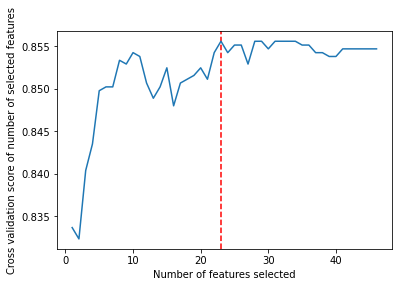

In [123]:
## Identifying optimal number of features and plotting results
print('Best Accuracy Score:', np.max(results))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.axvline(rfecv.n_features_,color='red',linestyle='--')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), results)
plt.show()

### 6. Modelling<a class="anchor" id="six"></a>

Before conducting any predictive modelling, it's important to address the imbalance in our dataset. If not, this will lead to algorithms being biased.

<AxesSubplot:>

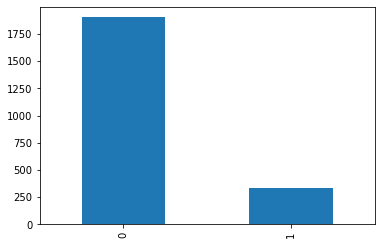

In [124]:
y.value_counts().plot(kind='bar')

**SMOTE**

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.

In [125]:
## Applying SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

**Comparison of Models**

In this portion of the notebook, we will implement a varity of different machine learning algorithms 


In [126]:
def get_models():
    models = dict()
    models['LR'] = LogisticRegression(max_iter=10000000)
    models['XGB'] = XGBClassifier()
    models['ADA'] = AdaBoostClassifier()
    models['RF'] =RandomForestClassifier()
    models['CAT'] = CatBoostClassifier(verbose=False)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


>LR 0.832 (0.014)


/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/1353638762.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


>XGB 0.936 (0.009)


/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/1353638762.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


>ADA 0.879 (0.010)


/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/1353638762.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


>RF 0.939 (0.008)


/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/1353638762.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


>CAT 0.937 (0.007)


/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/1353638762.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
/var/folders/5g/s74wxzwd60j0g9h6ml0pml_00000gn/T/ipykernel_53186/1353638762.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


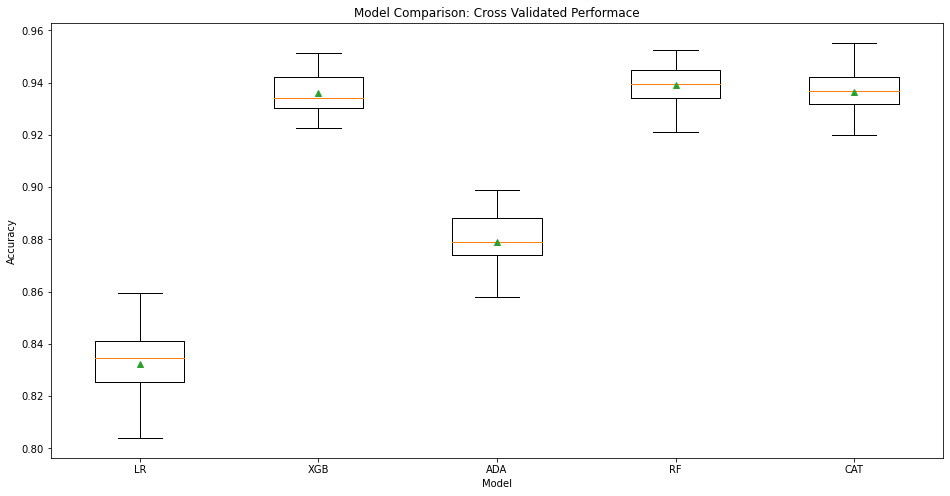

In [127]:
models = get_models()
# evaluate the models and store results 8.27
results, names = list(), list()
df_models=pd.DataFrame(columns=['Model','Mean_R2','STDev_R2','Median_R2'])
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
    row = {'Model': name,
           'Mean_R2': np.mean(scores),
           'STDev_R2': np.std(scores),
           'Median_R2': np.median(scores),
    }

    df_models = df_models.append(row, ignore_index=True)
# plot model performance for comparison
fig= plt.figure(figsize=(16,8))

plt.title('Model Comparison: Cross Validated Performace')

plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.boxplot(results, labels=names, showmeans=True)
fig.show()

In [128]:
## Identifying the model with the best score

best_model=df_models.sort_values('Mean_R2',ascending=False).iloc[0,:]

print(f'''Best model: {best_model.iloc[0]}, accuracy score: {round(best_model.iloc[1],4)}

''' )

Best model: RF, accuracy score: 0.939




**ROC Curve**

ROC (Receiver Operating Characteristics) is a probability curve and AUC (Area Under Curve) represents the degree or measure of separability. 

It tells how much the model is capable of distinguishing between classes. 

The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1


RF Performance Summary: 

Accuracy = %0.939

AUC Score= %0.985





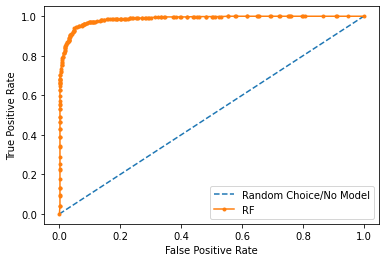

In [129]:
## Splitting train/test, one final run for interpretation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

ns_probs = [0 for _ in range(len(y_test))]

## Fitting the model and predicting values/ probabilities
model = models[best_model.iloc[0]]
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_true = np.array(y_test)


## Calculations for ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)     
AUC = metrics.auc(fpr, tpr)

lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print(f'''
{best_model.iloc[0]} Performance Summary: 

Accuracy = %{round(accuracy_score(y_true, y_pred),3)}

AUC Score= %{round(lr_auc,3)}


''')

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

## Plotting ROC/AUC

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Choice/No Model')
plt.plot(lr_fpr, lr_tpr, marker='.', label=str(best_model.iloc[0]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [130]:
## Evaluation of Results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       561
           1       0.92      0.96      0.94       581

    accuracy                           0.94      1142
   macro avg       0.94      0.94      0.94      1142
weighted avg       0.94      0.94      0.94      1142



### 7. Results & Interpretation <a class="anchor" id="seven"></a>

**Best performing model:**
Random forest

**Accuracy:** 
94%, the proportion of correct predictions of all customers (whether they responded or not).

**Precision:** 
92%, the proportion of all the customers that the model predicted would respond that actually responded

**Recall:** 96%, the proportion of all customers that actually responded and the model correctly predicted.

In [131]:
## Most important Features
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

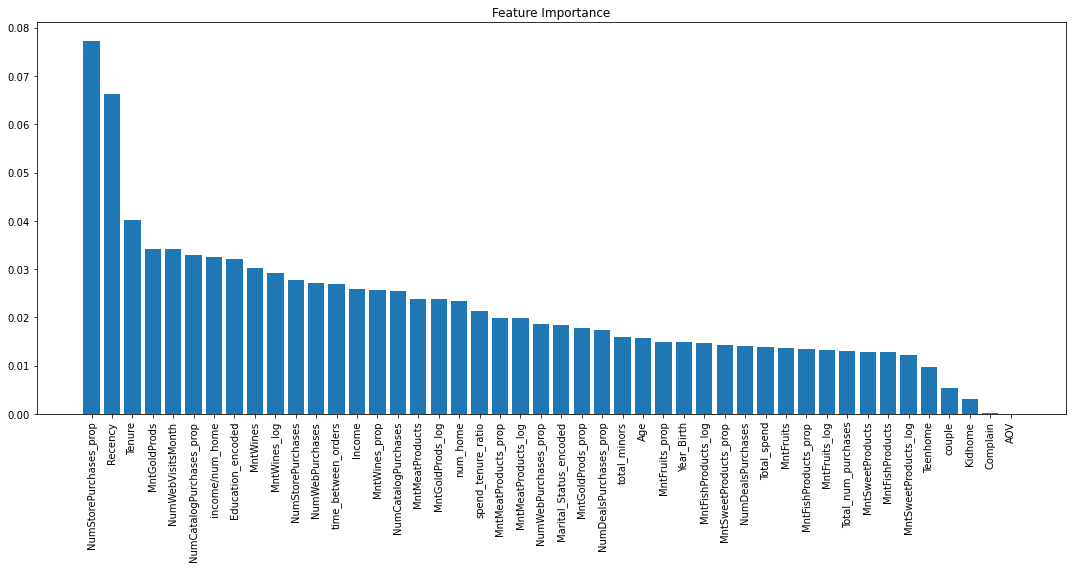

In [132]:
plt.figure(figsize=(15,8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()